# 本篇為二次優化查看頻道的各個影片資訊

## 同樣需要先導入package及設定需要的變數

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
api_service_name = "youtube"
api_version = "v3"
api_key = '你的金鑰'
youtube = build('youtube', 'v3', developerKey = api_key)

## 匯入上一支程式所匯出的excel

In [3]:
channel_data = pd.read_excel('MusicChannelData.xlsx', index_col=0)
channel_data

ChannelTitle                                 ChannelDescription  \
0         Ru's Piano Ru味春捲  I’m RuRu, a piano youtuber from Taiwan.\nMakin...   
1                 kobasolo  毎週金曜19時更新!!音楽プロデューサー、ミュージシャンとして活動するコバソロが贈るエンター...   
2                  2CELLOS  The official home of 2CELLOS - we post our new...   
3           THE FIRST TAKE  A microphone and a white studio.\n\nAnd 1 rule...   
4                    あいみょん  兵庫県西宮出身のシンガーソングライター。_x000D_\n15年3月にタワレコ限定singl...   
5                      星野源  音楽家・俳優・文筆家。\n2010年に1stアルバム『ばかのうた』にてソロデビュー。2016...   
6          Ayase / YOASOBI  シンガーソングライター、ボカロPのAyase、そしてAyaseがコンポーザーを務めるユニット...   
7                  Eric周興哲  Hi! 我是Eric周興哲,\n\n從前的我 喜歡練習獨立 和鋼琴說話\n現在的自己 \n把...   
8                      Ado                                              元気です。   
9    Joe Hisaishi Official  久石譲のYouTube公式チャンネルです。Official YouTube channel ...   
10          The Piano Guys  Welcome to the official The Piano Guys YouTube...   
11               Pan Piano  台湾のピアニストです！ \nアニソンを弾いてます～ \n良かったら、チャンネル登録お願いしま...   
12  ヨルシカ / n-buna Official                     ヨルシカ / n-buna official channel   
13                      美波                      【美波 Official Youtube Channel】   
14            周杰倫 Jay Chou  Jay Chou 周杰倫\n\n“New King of Asian Pop” — Time...   
15         First To Eleven  First to Eleven, Andie Case & Brooke Surgener ...   

   ChannelPublished Country  Subscribers  TotalViews  \
0        2018-03-14      TW      2310000   299852235   
1        2008-06-30      JP      3010000  1428323212   
2        2011-10-17      HR      6300000  1623449197   
3        2019-11-05      JP      6860000  2455470515   
4        2014-03-14     NaN      1760000  1540391747   
5        2015-05-08      JP      1470000   932112708   
6        2018-11-16      JP      4070000  2091104911   
7        2014-08-04      TW      1110000  1287840309   
8        2018-08-18      JP      4220000  1534485518   
9        2017-01-27      JP       876000   137620621   
10       2008-03-25      US      7030000  2214772684   
11       2016-07-27      TW      3400000   532432474   
12       2013-03-22     NaN      2570000  1446571523   
13       2016-01-03      JP      1310000   417607213   
14       2019-10-29      TW      2680000  3428410144   
15       2015-12-08      US      1450000   421481683   

                    Playlist  VideoCount  \
0   UUAYrMNl92jw6cpjdpBP8JyA         405   
1   UUDbQblY1XASbgqOXmy6FOFQ         500   
2   UUyjuFsbclXyntSRMBAILzbw         213   
3   UU9zY_E8mcAo_Oq772LEZq8Q         435   
4   UUQVhrypJhw1HxuRV4gX6hoQ          28   
5   UUPKlrgZXnnb89nSeITvTdGA          99   
6   UUvpredjG93ifbCP1Y77JyFA         118   
7   UU7S48XRADBqamQbgLxpBFcQ         131   
8   UUln9P4Qm3-EAY4aiEPmRwEA          87   
9   UUxyzciBLt1Hyw06dlqwAIkw          51   
10  UUmKurapML4BF9Bjtj4RbvXw         132   
11  UUI7ktPB6toqucpkkCiolwLg         557   
12  UURIgIJQWuBJ0Cv_VlU3USNA          51   
13  UU2JzylaIF8qeowc7-5VwwmA           7   
14  UU8CU5nVhCQIdAGrFFp4loOQ          21   
15  UUcE10s4MFy4eed7q7QkonZg         314   

                                         ChannelTopic  \
0       ['Classical_music', 'Music_of_Asia', 'Music']   
1             ['Pop_music', 'Music_of_Asia', 'Music']   
2   ['Rock_music', 'Classical_music', 'Independent...   
3             ['Pop_music', 'Music_of_Asia', 'Music']   
4   ['Pop_music', 'Music', 'Music_of_Asia', 'Rock_...   
5             ['Pop_music', 'Music_of_Asia', 'Music']   
6             ['Pop_music', 'Music_of_Asia', 'Music']   
7             ['Pop_music', 'Music_of_Asia', 'Music']   
8   ['Music_of_Asia', 'Rock_music', 'Pop_music', '...   
9                        ['Classical_music', 'Music']   
10          ['Classical_music', 'Pop_music', 'Music']   
11      ['Classical_music', 'Music_of_Asia', 'Music']   
12  ['Pop_music', 'Independent_music', 'Rock_music...   
13  ['Music_of_Asia', 'Music', 'Independent_music'...   
14            ['Pop_music', 'Music_of_Asia', 'Music']   
15  ['Music', 'Indepen

## 需要使用頻道的id才可取得頻道裡面，各個影片的 id
取得影片資訊：https://developers.google.com/youtube/v3/docs/playlistItems/list

In [4]:
df_ids = channel_data[['ChannelTitle', 'Playlist', 'VideoCount']]
df_ids

ChannelTitle                  Playlist  VideoCount
0         Ru's Piano Ru味春捲  UUAYrMNl92jw6cpjdpBP8JyA         405
1                 kobasolo  UUDbQblY1XASbgqOXmy6FOFQ         500
2                  2CELLOS  UUyjuFsbclXyntSRMBAILzbw         213
3           THE FIRST TAKE  UU9zY_E8mcAo_Oq772LEZq8Q         435
4                    あいみょん  UUQVhrypJhw1HxuRV4gX6hoQ          28
5                      星野源  UUPKlrgZXnnb89nSeITvTdGA          99
6          Ayase / YOASOBI  UUvpredjG93ifbCP1Y77JyFA         118
7                  Eric周興哲  UU7S48XRADBqamQbgLxpBFcQ         131
8                      Ado  UUln9P4Qm3-EAY4aiEPmRwEA          87
9    Joe Hisaishi Official  UUxyzciBLt1Hyw06dlqwAIkw          51
10          The Piano Guys  UUmKurapML4BF9Bjtj4RbvXw         132
11               Pan Piano  UUI7ktPB6toqucpkkCiolwLg         557
12  ヨルシカ / n-buna Official  UURIgIJQWuBJ0Cv_VlU3USNA          51
13                      美波  UU2JzylaIF8qeowc7-5VwwmA           7
14            周杰倫 Jay Chou  UU8CU5nVhCQIdAGrFFp4loOQ          21
15         First To Eleven  UUcE10s4MFy4eed7q7QkonZg         314

## 需要先透過"頻道"的id，取得各個"影片"的id
影片一次最多只能取得50筆(一頁50部影片)，故api有提供nextPagetoken這個變數，若此變數為True，我們就能取得其他頁數的影片id

In [5]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
              part = 'contentDetails',
              playlistId = playlist_id,
              maxResults = 50) # 50 is max
    response = request.execute()
    
    video_ids = []
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages: 
        if next_page_token is None:
            more_pages = False
        else: # json存在nextPageToken，透過以下取得50以上的videos
            request = youtube.playlistItems().list(
                    part = 'contentDetails',
                    playlistId = playlist_id,
                    pageToken = next_page_token)
            response = request.execute()
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token = response.get('nextPageToken')
    print('影片數量:', len(video_ids))
    return video_ids

In [6]:
playlist_id01 = channel_data.loc[channel_data['ChannelTitle'] == "Ru's Piano Ru味春捲", 'Playlist'].iloc[0]
playlist_id02 = channel_data.loc[channel_data['ChannelTitle'] == 'Pan Piano', 'Playlist'].iloc[0]
playlist_id03 = channel_data.loc[channel_data['ChannelTitle'] == '2CELLOS', 'Playlist'].iloc[0]
playlist_id04 = channel_data.loc[channel_data['ChannelTitle'] == 'The Piano Guys', 'Playlist'].iloc[0]
playlist_id05 = channel_data.loc[channel_data['ChannelTitle'] == 'Joe Hisaishi Official', 'Playlist'].iloc[0]

playlist_id06 = channel_data.loc[channel_data['ChannelTitle'] == 'Ado', 'Playlist'].iloc[0]
playlist_id07 = channel_data.loc[channel_data['ChannelTitle'] == 'Ayase / YOASOBI', 'Playlist'].iloc[0]
playlist_id08 = channel_data.loc[channel_data['ChannelTitle'] == '星野源', 'Playlist'].iloc[0]
playlist_id09 = channel_data.loc[channel_data['ChannelTitle'] == '美波', 'Playlist'].iloc[0]
playlist_id10 = channel_data.loc[channel_data['ChannelTitle'] == 'あいみょん', 'Playlist'].iloc[0]
playlist_id11 = channel_data.loc[channel_data['ChannelTitle'] == 'ヨルシカ / n-buna Official', 'Playlist'].iloc[0]
playlist_id12 = channel_data.loc[channel_data['ChannelTitle'] == 'Eric周興哲', 'Playlist'].iloc[0]
playlist_id13 = channel_data.loc[channel_data['ChannelTitle'] == '周杰倫 Jay Chou', 'Playlist'].iloc[0]

playlist_id14 = channel_data.loc[channel_data['ChannelTitle'] == 'THE FIRST TAKE', 'Playlist'].iloc[0]
playlist_id15 = channel_data.loc[channel_data['ChannelTitle'] == 'kobasolo', 'Playlist'].iloc[0]
playlist_id16 = channel_data.loc[channel_data['ChannelTitle'] == 'First To Eleven', 'Playlist'].iloc[0]

In [7]:
video_ids01 = get_video_ids(youtube, playlist_id01)
video_ids02 = get_video_ids(youtube, playlist_id02)
video_ids03 = get_video_ids(youtube, playlist_id03)
video_ids04 = get_video_ids(youtube, playlist_id04)
video_ids05 = get_video_ids(youtube, playlist_id05)
video_ids06 = get_video_ids(youtube, playlist_id06)
video_ids07 = get_video_ids(youtube, playlist_id07)
video_ids08 = get_video_ids(youtube, playlist_id08)
video_ids09 = get_video_ids(youtube, playlist_id09)
video_ids10 = get_video_ids(youtube, playlist_id10)
video_ids11 = get_video_ids(youtube, playlist_id11)
video_ids12 = get_video_ids(youtube, playlist_id12)
video_ids13 = get_video_ids(youtube, playlist_id13)
video_ids14 = get_video_ids(youtube, playlist_id14)
video_ids15 = get_video_ids(youtube, playlist_id15)
video_ids16 = get_video_ids(youtube, playlist_id16)

影片數量: 405
影片數量: 558
影片數量: 214
影片數量: 132
影片數量: 51
影片數量: 88
影片數量: 119
影片數量: 99
影片數量: 7
影片數量: 30
影片數量: 52
影片數量: 131
影片數量: 21
影片數量: 435
影片數量: 501
影片數量: 314


## 可透過以下測試查看"影片"的欄位資料

In [8]:
# def test_channel_video_detail(youtube, video_ids):
#     for i in range(0, len(video_ids), 50):
#         request = youtube.videos().list(
#         part = 'snippet, statistics,topicDetails, status, player, liveStreamingDetails',
#         id=','.join(video_ids[i:i+50]))
#     response = request.execute()
    
#     return response

In [8]:
# test_channel_video_detail(youtube, video_ids01) 

## 查看過後抓取特定欄位並轉成將其轉為dictionary

In [8]:
def get_channel_video_detail(youtube, video_ids):
    
    all_video_stats = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
        part = 'snippet, statistics, topicDetails',
        id=','.join(video_ids[i:i+50]))
        response = request.execute()
        for video in response['items']:
            video_stats = dict(ChannelTitle = video['snippet']['channelTitle'],
                               VideoTitle = video['snippet']['title'],
                               Description = video['snippet']['description'],
                               PublishedAt = video['snippet']['publishedAt'],
                               Language = '',
                               Views = video['statistics']['viewCount'],
                               Likes = '',
                               CommentCount = '',
                               Image = video['snippet']['thumbnails']['high']['url'],
                               Tags = '',
                               VideoTopic = '')
            if 'tags' in video['snippet']:video_stats['Tags'] = video['snippet']['tags']
            if 'topicDetails' in video:video_stats['VideoTopic'] = video['topicDetails']['topicCategories']
            if 'defaultAudioLanguage' in video['snippet']:video_stats['Language'] = video['snippet']['defaultAudioLanguage']
            if 'commentCount' in video['statistics']:video_stats['CommentCount'] = video['statistics']['commentCount']
            if 'likecount' in video['statistics']:video_stats['Likes'] = video['statistics']['likeCount']
            all_video_stats.append(video_stats)
    return all_video_stats

In [9]:
video_details01 = get_channel_video_detail(youtube, video_ids01)
video_details02 = get_channel_video_detail(youtube, video_ids02)
video_details03 = get_channel_video_detail(youtube, video_ids03)
video_details04 = get_channel_video_detail(youtube, video_ids04)
video_details05 = get_channel_video_detail(youtube, video_ids05)
video_details06 = get_channel_video_detail(youtube, video_ids06)
video_details07 = get_channel_video_detail(youtube, video_ids07)
video_details08 = get_channel_video_detail(youtube, video_ids08)
video_details09 = get_channel_video_detail(youtube, video_ids09)
video_details10 = get_channel_video_detail(youtube, video_ids10)
video_details11 = get_channel_video_detail(youtube, video_ids11)
video_details12 = get_channel_video_detail(youtube, video_ids12)
video_details13 = get_channel_video_detail(youtube, video_ids13)
video_details14 = get_channel_video_detail(youtube, video_ids14)
video_details15 = get_channel_video_detail(youtube, video_ids15)
video_details16 = get_channel_video_detail(youtube, video_ids16)

## 取得過後同樣將其轉為DataFrame以方便查看

In [10]:
data_rurupaino = pd.DataFrame(video_details01)
data_panpaino = pd.DataFrame(video_details02)
data_2CELLOS = pd.DataFrame(video_details03)
data_thepainoguys = pd.DataFrame(video_details04)
data_joehisaishi = pd.DataFrame(video_details05)

data_ado = pd.DataFrame(video_details06)
data_YOASOBI = pd.DataFrame(video_details07)
data_hoshinogen = pd.DataFrame(video_details08)
data_minami = pd.DataFrame(video_details09)
data_aimyo = pd.DataFrame(video_details10)
data_yurushika = pd.DataFrame(video_details11)
data_ericchou = pd.DataFrame(video_details12)
data_jaychou = pd.DataFrame(video_details13)

data_thefirsttake = pd.DataFrame(video_details14)
data_kobasolo = pd.DataFrame(video_details15)
data_firsttoeleven = pd.DataFrame(video_details16)

## 同樣針對部分資料做整理，包含主題、資料型態等

In [11]:
def get_topic(df):
    col = []
    topic = []
    for i in df['VideoTopic']:
        if i == '':
            col.append('')
        else:
            for j in range(len(i)):
                topic.append(i[j].split('/')[4])
            col.append(topic)
            topic = []
    df['VideoTopic'] = col
    return df.head()

In [12]:
get_topic(data_rurupaino)
get_topic(data_panpaino)
get_topic(data_2CELLOS)
get_topic(data_thepainoguys)
get_topic(data_joehisaishi)

get_topic(data_ado)
get_topic(data_YOASOBI) 
get_topic(data_hoshinogen)
get_topic(data_minami)
get_topic(data_aimyo)
get_topic(data_yurushika)
get_topic(data_ericchou)
get_topic(data_jaychou)

get_topic(data_thefirsttake)
get_topic(data_kobasolo)
get_topic(data_firsttoeleven)

ChannelTitle                                         VideoTitle  \
0  First To Eleven  "It's Gonna Kill Me" - Filter (Cover by First ...   
1  First To Eleven  "I Want It That Way" - Backstreet Boys (Cover ...   
2  First To Eleven  "This Is Why" - Paramore (Cover by First to El...   
3  First To Eleven  "My Happy Ending" - Avril Lavigne (Cover by Fi...   
4  First To Eleven  "I Like You (A Happier Song)" - Post Malone (C...   

                                         Description           PublishedAt  \
0  Our cover of “It's Gonna Kill Me" by Filter!\n...  2022-10-13T16:00:06Z   
1  Our cover of “I Want It That Way" by the Backs...  2022-10-06T16:00:01Z   
2  Our cover of “This is Why" by Paramore!\n\nSup...  2022-10-04T16:01:40Z   
3  Our cover of “My Happy Ending” by Avril Lavign...  2022-09-29T16:00:05Z   
4  Our cover of “I Like You” by Post Malone featu...  2022-09-22T16:00:19Z   

  Language   Views Likes CommentCount  \
0       en   50082                365   
1       en  110150                452   
2       en  112266                413   
3       en  211846                541   
4       en   96724                236   

                                              Image  \
0  https://i.ytimg.com/vi/hAqxSFHpDpU/hqdefault.jpg   
1  https://i.ytimg.com/vi/Jl3m9CKyzDo/hqdefault.jpg   
2  https://i.ytimg.com/vi/h4yWt5romzg/hqdefault.jpg   
3  https://i.ytimg.com/vi/epepDBIAJD8/hqdefault.jpg   
4  https://i.ytimg.com/vi/d7uWXMhrdBM/hqdefault.jpg   

                                                Tags  \
0  [its gonna kill me, filter, hey man nice shot,...   
1  [i want it that way, david michael frank, dmf,...   
2  [this is why, paramore, misery business, decod...   
3  [my happy ending, avril lavigne, sk8r boi, com...   
4  [i like you, post malone, doja cat, a happier ...   

                       VideoTopic  
0  [Music, Pop_music, Rock_music]  
1  [Music, Pop_music, Rock_music]  
2  [Music, Pop_music, Rock_music]  
3  [Music, Pop_music, Rock_music]  
4  [Music, Pop_music, Rock_music]

## 資量型態轉換

In [13]:
def columns_type_format(df):
    df['PublishedAt'] = pd.to_datetime(df['PublishedAt']).dt.date
    df['Views'] = pd.to_numeric(df['Views'])
    df['Likes'] = pd.to_numeric(df['Likes'])
    df['CommentCount'] = pd.to_numeric(df['CommentCount'])
    return df.head()

In [14]:
columns_type_format(data_rurupaino)
columns_type_format(data_panpaino)
columns_type_format(data_2CELLOS)
columns_type_format(data_thepainoguys)
columns_type_format(data_joehisaishi)

columns_type_format(data_ado)
columns_type_format(data_YOASOBI) 
columns_type_format(data_hoshinogen)
columns_type_format(data_minami)
columns_type_format(data_aimyo)
columns_type_format(data_yurushika)
columns_type_format(data_ericchou)
columns_type_format(data_jaychou)

columns_type_format(data_thefirsttake)
columns_type_format(data_kobasolo)
columns_type_format(data_firsttoeleven)

ChannelTitle                                         VideoTitle  \
0  First To Eleven  "It's Gonna Kill Me" - Filter (Cover by First ...   
1  First To Eleven  "I Want It That Way" - Backstreet Boys (Cover ...   
2  First To Eleven  "This Is Why" - Paramore (Cover by First to El...   
3  First To Eleven  "My Happy Ending" - Avril Lavigne (Cover by Fi...   
4  First To Eleven  "I Like You (A Happier Song)" - Post Malone (C...   

                                         Description PublishedAt Language  \
0  Our cover of “It's Gonna Kill Me" by Filter!\n...  2022-10-13       en   
1  Our cover of “I Want It That Way" by the Backs...  2022-10-06       en   
2  Our cover of “This is Why" by Paramore!\n\nSup...  2022-10-04       en   
3  Our cover of “My Happy Ending” by Avril Lavign...  2022-09-29       en   
4  Our cover of “I Like You” by Post Malone featu...  2022-09-22       en   

    Views  Likes  CommentCount  \
0   50082    NaN           365   
1  110150    NaN           452   
2  112266    NaN           413   
3  211846    NaN           541   
4   96724    NaN           236   

                                              Image  \
0  https://i.ytimg.com/vi/hAqxSFHpDpU/hqdefault.jpg   
1  https://i.ytimg.com/vi/Jl3m9CKyzDo/hqdefault.jpg   
2  https://i.ytimg.com/vi/h4yWt5romzg/hqdefault.jpg   
3  https://i.ytimg.com/vi/epepDBIAJD8/hqdefault.jpg   
4  https://i.ytimg.com/vi/d7uWXMhrdBM/hqdefault.jpg   

                                                Tags  \
0  [its gonna kill me, filter, hey man nice shot,...   
1  [i want it that way, david michael frank, dmf,...   
2  [this is why, paramore, misery business, decod...   
3  [my happy ending, avril lavigne, sk8r boi, com...   
4  [i like you, post malone, doja cat, a happier ...   

                       VideoTopic  
0  [Music, Pop_music, Rock_music]  
1  [Music, Pop_music, Rock_music]  
2  [Music, Pop_music, Rock_music]  
3  [Music, Pop_music, Rock_music]  
4  [Music, Pop_music, Rock_music]

## 畫出個別頻道的文字雲

In [15]:
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
from os import path
def plot_wordcloud(df):
    print('ChannelName:', df['ChannelTitle'][0])
    all_terms = []
    if df['Tags'].isnull().all():
        return 'No Tags'
    else:
        for terms in df['Tags']:
            all_terms.extend(terms)
        sorted(dict(Counter(all_terms)).items(), key=lambda x:x[1], reverse=True)        

        # mask = np.array(Image.open("wordcloud.png"))
        font_path = 'ttf/GenEiAntiquePv5-M.ttf'
        wc = WordCloud(width=1600, height=800, background_color='white', font_path = font_path)
        wc.generate_from_frequencies(frequencies=dict(Counter(all_terms)))
        plt.figure(figsize=(12, 8))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.show()

ChannelName: Ru's Piano Ru味春捲


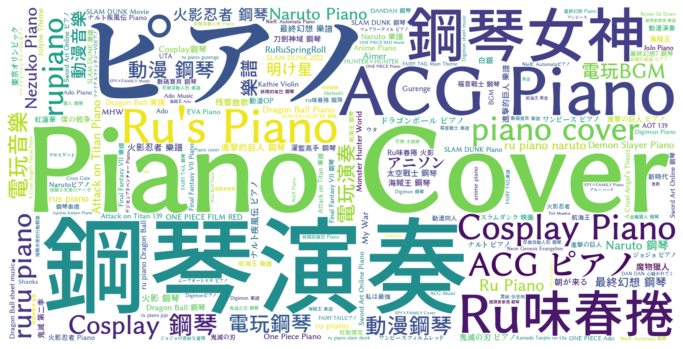

ChannelName: Pan Piano


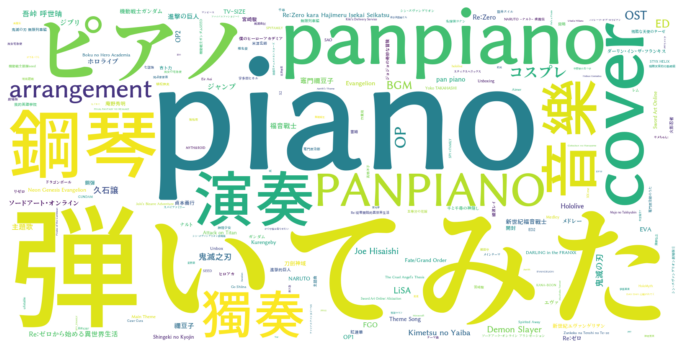

ChannelName: 2CELLOS


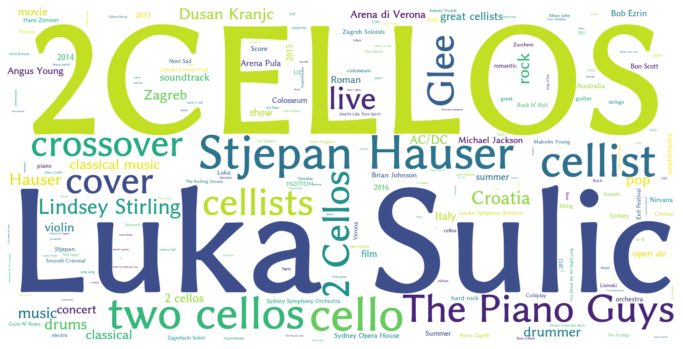

ChannelName: The Piano Guys


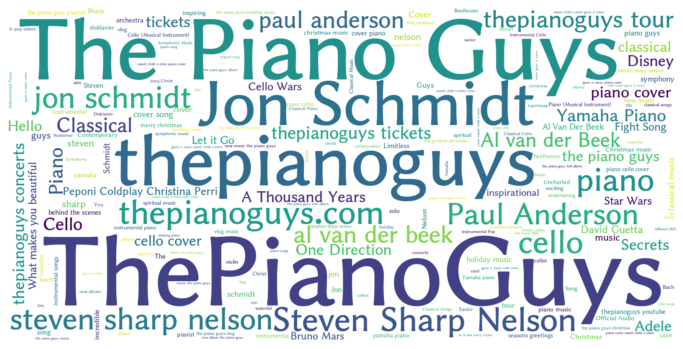

ChannelName: Joe Hisaishi Official


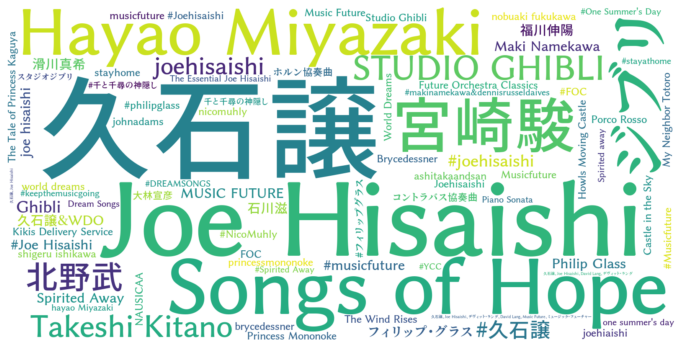

ChannelName: Ado


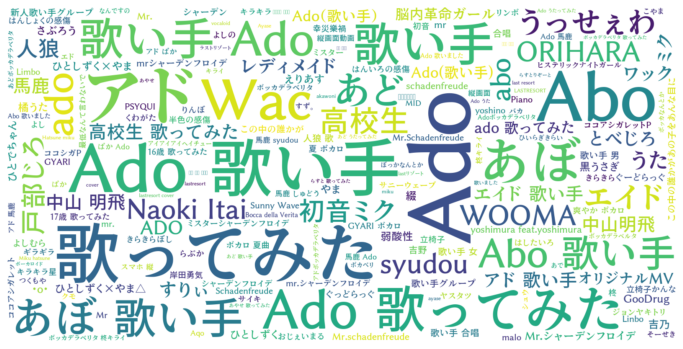

ChannelName: Ayase / YOASOBI


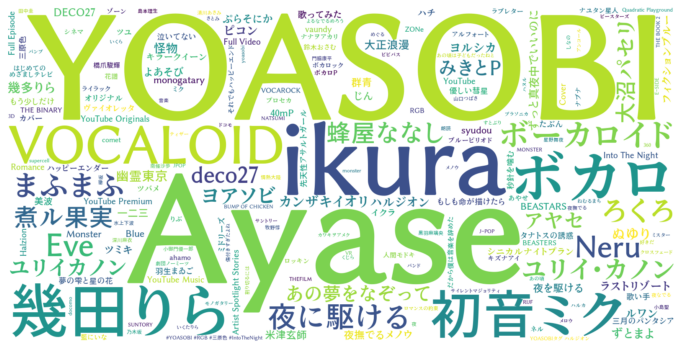

ChannelName: 星野源


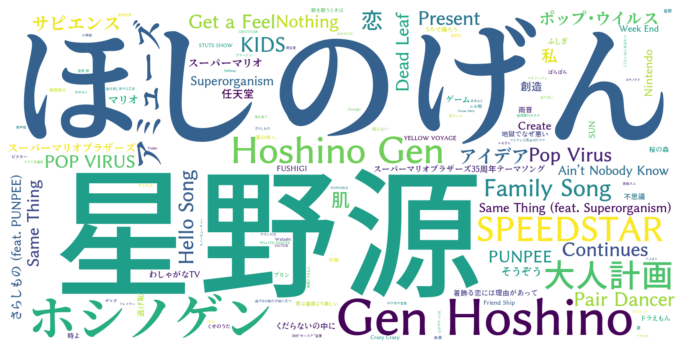

ChannelName: あいみょん


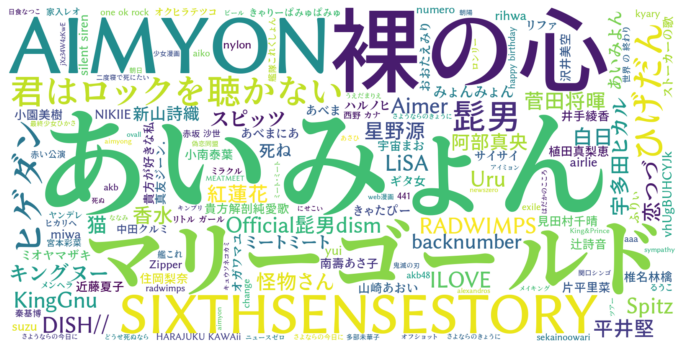

ChannelName: ヨルシカ / n-buna Official


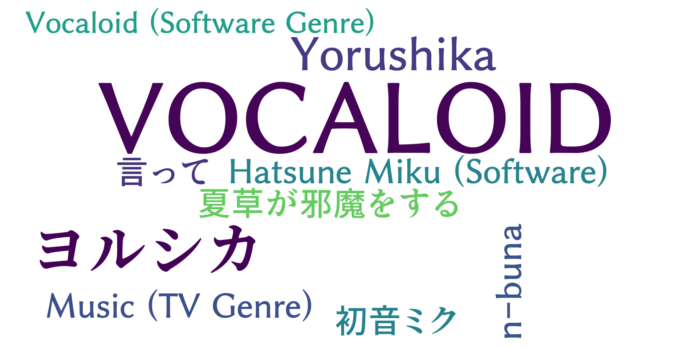

ChannelName: Eric周興哲


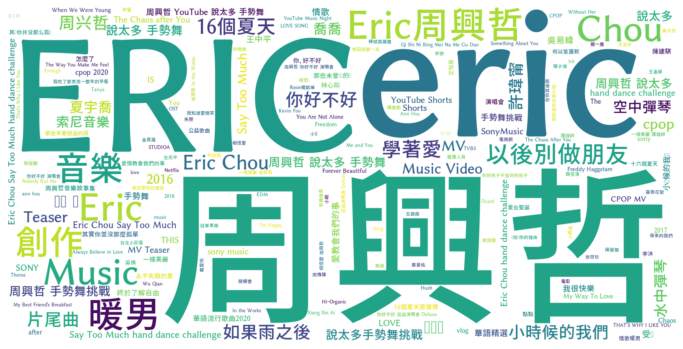

ChannelName: 周杰倫 Jay Chou


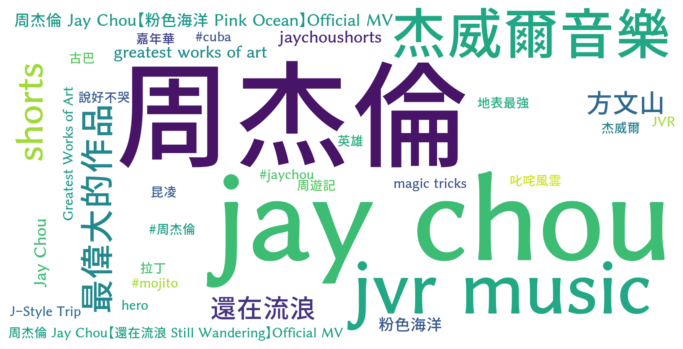

ChannelName: THE FIRST TAKE


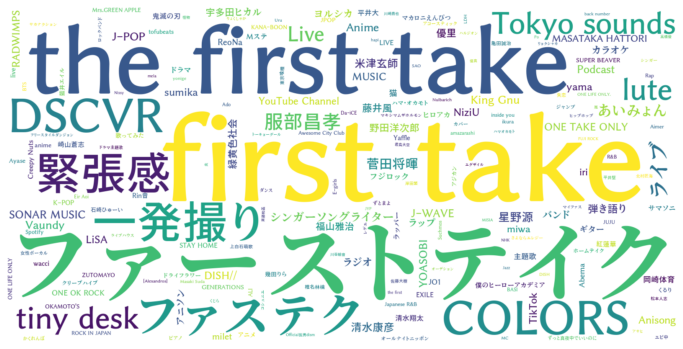

ChannelName: kobasolo


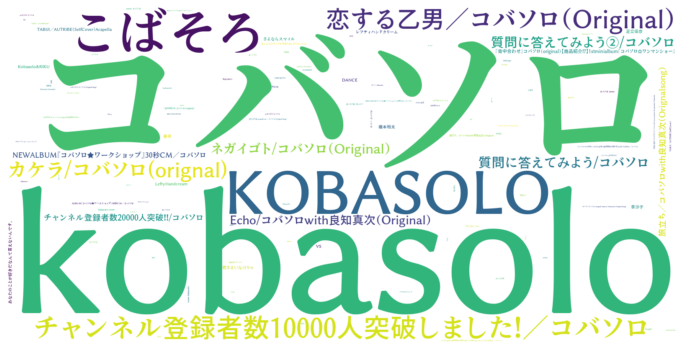

ChannelName: First To Eleven


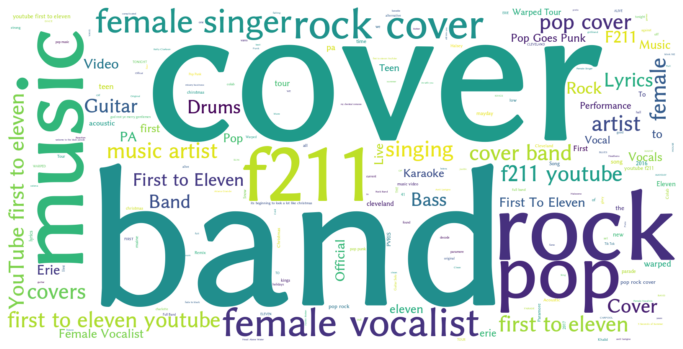

In [16]:
plot_wordcloud(data_rurupaino)
plot_wordcloud(data_panpaino)
plot_wordcloud(data_2CELLOS)
plot_wordcloud(data_thepainoguys)
plot_wordcloud(data_joehisaishi)

plot_wordcloud(data_ado)
plot_wordcloud(data_YOASOBI) 
plot_wordcloud(data_hoshinogen)
# plot_wordcloud(data_minami)
plot_wordcloud(data_aimyo)
plot_wordcloud(data_yurushika)
plot_wordcloud(data_ericchou)
plot_wordcloud(data_jaychou)

plot_wordcloud(data_thefirsttake)
plot_wordcloud(data_kobasolo)
plot_wordcloud(data_firsttoeleven)

## 合併全部的表格

In [17]:
data_all_channel = pd.concat([data_rurupaino,
                             data_panpaino,
                             data_2CELLOS,
                             data_thepainoguys,
                             data_joehisaishi,
                             data_ado,
                             data_YOASOBI,
                             data_hoshinogen,
                             data_minami,
                             data_aimyo,
                             data_yurushika,
                             data_ericchou,
                             data_jaychou,
                             data_thefirsttake,
                             data_kobasolo,
                             data_firsttoeleven],ignore_index=True)

In [18]:
data_all_channel.head()

ChannelTitle                                         VideoTitle  \
0  Ru's Piano Ru味春捲  NARUTO 20th Anniversary『ROAD OF NARUTO』Piano M...   
1  Ru's Piano Ru味春捲  When Lucy Plays「Let You Down」Cyberpunk: Edgeru...   
2  Ru's Piano Ru味春捲  When Lucy Plays「I Really Want to Stay at Your ...   
3  Ru's Piano Ru味春捲  Lycoris Recoil ED「Tower of Flower / Hana no To...   
4  Ru's Piano Ru味春捲  SPY×FAMILY OP2「SOUVENIR」Ru's Piano Cover | SPY...   

                                         Description PublishedAt Language  \
0  NARUTO 20th Anniversary「ROAD OF NARUTO」Piano M...  2022-10-15    en-US   
1  When Lucy Plays「Let You Down」Cyberpunk: Edgeru...  2022-10-12    en-US   
2  When Lucy Plays「I Really Want to Stay at Your ...  2022-10-08    en-US   
3  Lycoris Recoil ED「Tower of Flower」Emotional Ve...  2022-10-05    en-US   
4  SPY×FAMILY OP2「SOUVENIR」Ru's Piano Cover (TV S...  2022-10-01    en-US   

     Views  Likes  CommentCount  \
0    47031    NaN         480.0   
1   123296    NaN         558.0   
2  1264753    NaN        2169.0   
3   103201    NaN         413.0   
4    82592    NaN         386.0   

                                              Image  \
0  https://i.ytimg.com/vi/MhB_5gu5Ufo/hqdefault.jpg   
1  https://i.ytimg.com/vi/D3pvMwKY854/hqdefault.jpg   
2  https://i.ytimg.com/vi/xu4eioDS_OM/hqdefault.jpg   
3  https://i.ytimg.com/vi/6X-DZOe3-Ck/hqdefault.jpg   
4  https://i.ytimg.com/vi/sMJq79PfqzM/hqdefault.jpg   

                                                Tags  \
0  [ROAD OF NARUTO, NARUTO -ナルト-, 20周年記念, 火影忍者, N...   
1  [Cyberpunk: Edgerunners, Let You Down, 電馭叛客, 露...   
2  [I Really Want to Stay at Your House, 電馭叛客, 一起...   
3  [Lycoris Recoil, Tower of Flower, 花の塔, Sakana,...   
4  [SPY×FAMILY Part2, 間諜家家酒 新歌, SOUVENIR, 間諜家家酒 O...   

                                VideoTopic  
0                   [Music, Music_of_Asia]  
1                 [Classical_music, Music]  
2                   [Music, Music_of_Asia]  
3  [Classical_music, Music, Music_of_Asia]  
4  [Classical_music, Music, Music_of_Asia]

In [19]:
def cal_tag_num(df):
    tag_num = []
    for i in df['Tags']:
        tag_num.append(len(i))
    df.insert(10, column = "VideoTagNum", value = tag_num)
    return df.head()

In [20]:
cal_tag_num(data_all_channel)

ChannelTitle                                         VideoTitle  \
0  Ru's Piano Ru味春捲  NARUTO 20th Anniversary『ROAD OF NARUTO』Piano M...   
1  Ru's Piano Ru味春捲  When Lucy Plays「Let You Down」Cyberpunk: Edgeru...   
2  Ru's Piano Ru味春捲  When Lucy Plays「I Really Want to Stay at Your ...   
3  Ru's Piano Ru味春捲  Lycoris Recoil ED「Tower of Flower / Hana no To...   
4  Ru's Piano Ru味春捲  SPY×FAMILY OP2「SOUVENIR」Ru's Piano Cover | SPY...   

                                         Description PublishedAt Language  \
0  NARUTO 20th Anniversary「ROAD OF NARUTO」Piano M...  2022-10-15    en-US   
1  When Lucy Plays「Let You Down」Cyberpunk: Edgeru...  2022-10-12    en-US   
2  When Lucy Plays「I Really Want to Stay at Your ...  2022-10-08    en-US   
3  Lycoris Recoil ED「Tower of Flower」Emotional Ve...  2022-10-05    en-US   
4  SPY×FAMILY OP2「SOUVENIR」Ru's Piano Cover (TV S...  2022-10-01    en-US   

     Views  Likes  CommentCount  \
0    47031    NaN         480.0   
1   123296    NaN         558.0   
2  1264753    NaN        2169.0   
3   103201    NaN         413.0   
4    82592    NaN         386.0   

                                              Image  \
0  https://i.ytimg.com/vi/MhB_5gu5Ufo/hqdefault.jpg   
1  https://i.ytimg.com/vi/D3pvMwKY854/hqdefault.jpg   
2  https://i.ytimg.com/vi/xu4eioDS_OM/hqdefault.jpg   
3  https://i.ytimg.com/vi/6X-DZOe3-Ck/hqdefault.jpg   
4  https://i.ytimg.com/vi/sMJq79PfqzM/hqdefault.jpg   

                                                Tags  VideoTagNum  \
0  [ROAD OF NARUTO, NARUTO -ナルト-, 20周年記念, 火影忍者, N...           41   
1  [Cyberpunk: Edgerunners, Let You Down, 電馭叛客, 露...           37   
2  [I Really Want to Stay at Your House, 電馭叛客, 一起...           37   
3  [Lycoris Recoil, Tower of Flower, 花の塔, Sakana,...           39   
4  [SPY×FAMILY Part2, 間諜家家酒 新歌, SOUVENIR, 間諜家家酒 O...           37   

                                VideoTopic  
0                   [Music, Music_of_Asia]  
1                 [Classical_music, Music]  
2                   [Music, Music_of_Asia]  
3  [Classical_music, Music, Music_of_Asia]  
4  [Classical_music, Music, Music_of_Asia]

In [21]:
def cal_topic_num(df):
    topic_num = []
    for i in df['VideoTopic']:
        topic_num.append(len(i))
    df.insert(12, column = "VideoTopicNum", value = topic_num)
    return df.head()

In [22]:
cal_topic_num(data_all_channel)

ChannelTitle                                         VideoTitle  \
0  Ru's Piano Ru味春捲  NARUTO 20th Anniversary『ROAD OF NARUTO』Piano M...   
1  Ru's Piano Ru味春捲  When Lucy Plays「Let You Down」Cyberpunk: Edgeru...   
2  Ru's Piano Ru味春捲  When Lucy Plays「I Really Want to Stay at Your ...   
3  Ru's Piano Ru味春捲  Lycoris Recoil ED「Tower of Flower / Hana no To...   
4  Ru's Piano Ru味春捲  SPY×FAMILY OP2「SOUVENIR」Ru's Piano Cover | SPY...   

                                         Description PublishedAt Language  \
0  NARUTO 20th Anniversary「ROAD OF NARUTO」Piano M...  2022-10-15    en-US   
1  When Lucy Plays「Let You Down」Cyberpunk: Edgeru...  2022-10-12    en-US   
2  When Lucy Plays「I Really Want to Stay at Your ...  2022-10-08    en-US   
3  Lycoris Recoil ED「Tower of Flower」Emotional Ve...  2022-10-05    en-US   
4  SPY×FAMILY OP2「SOUVENIR」Ru's Piano Cover (TV S...  2022-10-01    en-US   

     Views  Likes  CommentCount  \
0    47031    NaN         480.0   
1   123296    NaN         558.0   
2  1264753    NaN        2169.0   
3   103201    NaN         413.0   
4    82592    NaN         386.0   

                                              Image  \
0  https://i.ytimg.com/vi/MhB_5gu5Ufo/hqdefault.jpg   
1  https://i.ytimg.com/vi/D3pvMwKY854/hqdefault.jpg   
2  https://i.ytimg.com/vi/xu4eioDS_OM/hqdefault.jpg   
3  https://i.ytimg.com/vi/6X-DZOe3-Ck/hqdefault.jpg   
4  https://i.ytimg.com/vi/sMJq79PfqzM/hqdefault.jpg   

                                                Tags  VideoTagNum  \
0  [ROAD OF NARUTO, NARUTO -ナルト-, 20周年記念, 火影忍者, N...           41   
1  [Cyberpunk: Edgerunners, Let You Down, 電馭叛客, 露...           37   
2  [I Really Want to Stay at Your House, 電馭叛客, 一起...           37   
3  [Lycoris Recoil, Tower of Flower, 花の塔, Sakana,...           39   
4  [SPY×FAMILY Part2, 間諜家家酒 新歌, SOUVENIR, 間諜家家酒 O...           37   

                                VideoTopic  VideoTopicNum  
0                   [Music, Music_of_Asia]              2  
1                 [Classical_music, Music]              2  
2                   [Music, Music_of_Asia]              2  
3  [Classical_music, Music, Music_of_Asia]              3  
4  [Classical_music, Music, Music_of_Asia]              3

In [23]:
def topic_to_col(df):
    max_topic_num = max(df['VideoTopic'].str.len())
    topic_col = []
    topic_num = []
    for i in range(max_topic_num):
        topic_col.append(f'VideoTopic{i+1}')
    if df['VideoTopic'][0] == '':
        df['VideoTopic'][0] = []
    df1 = pd.DataFrame(df['VideoTopic'].tolist(), columns = topic_col)
    df2 = pd.concat([df, df1], axis=1)
    df2['VideoTopic'][0] = ''
    df = df2
    return df

In [24]:
# data_2CELLOS = topic_to_col(data_2CELLOS)
# data_minami = topic_to_col(data_minami)
# data_ado = topic_to_col(data_ado)
# data_YOASOBI = topic_to_col(data_YOASOBI)
# data_hoshinogen = topic_to_col(data_hoshinogen)
# data_kobasolo = topic_to_col(data_kobasolo)
# data_rurupaino = topic_to_col(data_rurupaino)
# data_panpaino = topic_to_col(data_panpaino)
# data_thefirsttake = topic_to_col(data_thefirsttake)
data_all_channel = topic_to_col(data_all_channel)

/var/folders/tt/k9v_l22j5nx90qgy_z36k4zh0000gn/T/ipykernel_18282/2216340177.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['VideoTopic'][0] = ''


In [25]:
def tags_to_col(df):
    max_topic_num = max(df['Tags'].str.len())
    tag_col = []
    tag_num = []
    for i in range(max_topic_num):
        tag_col.append(f'Tag{i+1}')
    if df['Tags'][0] == '':
        df['Tags'][0] = []
    df1 = pd.DataFrame(df['Tags'].tolist(), columns = tag_col)
    df2 = pd.concat([df, df1], axis=1)
    df2['Tags'][0] = ''
    df = df2
    return df

In [26]:
# data_2CELLOS = tags_to_col(data_2CELLOS)
# # tag_to_col(data_minami)
# data_ado = tags_to_col(data_ado)
# data_YOASOBI = tags_to_col(data_YOASOBI)
# data_hoshinogen = tags_to_col(data_hoshinogen)
# data_kobasolo = tags_to_col(data_kobasolo)
# data_rurupaino = tags_to_col(data_rurupaino)
# data_panpaino = tags_to_col(data_panpaino)
# data_thefirsttake = tags_to_col(data_thefirsttake)
data_all_channel = tags_to_col(data_all_channel)

/var/folders/tt/k9v_l22j5nx90qgy_z36k4zh0000gn/T/ipykernel_18282/2242556798.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Tags'][0] = ''


In [27]:
data_all_channel.head()

ChannelTitle                                         VideoTitle  \
0  Ru's Piano Ru味春捲  NARUTO 20th Anniversary『ROAD OF NARUTO』Piano M...   
1  Ru's Piano Ru味春捲  When Lucy Plays「Let You Down」Cyberpunk: Edgeru...   
2  Ru's Piano Ru味春捲  When Lucy Plays「I Really Want to Stay at Your ...   
3  Ru's Piano Ru味春捲  Lycoris Recoil ED「Tower of Flower / Hana no To...   
4  Ru's Piano Ru味春捲  SPY×FAMILY OP2「SOUVENIR」Ru's Piano Cover | SPY...   

                                         Description PublishedAt Language  \
0  NARUTO 20th Anniversary「ROAD OF NARUTO」Piano M...  2022-10-15    en-US   
1  When Lucy Plays「Let You Down」Cyberpunk: Edgeru...  2022-10-12    en-US   
2  When Lucy Plays「I Really Want to Stay at Your ...  2022-10-08    en-US   
3  Lycoris Recoil ED「Tower of Flower」Emotional Ve...  2022-10-05    en-US   
4  SPY×FAMILY OP2「SOUVENIR」Ru's Piano Cover (TV S...  2022-10-01    en-US   

     Views  Likes  CommentCount  \
0    47031    NaN         480.0   
1   123296    NaN         558.0   
2  1264753    NaN        2169.0   
3   103201    NaN         413.0   
4    82592    NaN         386.0   

                                              Image  \
0  https://i.ytimg.com/vi/MhB_5gu5Ufo/hqdefault.jpg   
1  https://i.ytimg.com/vi/D3pvMwKY854/hqdefault.jpg   
2  https://i.ytimg.com/vi/xu4eioDS_OM/hqdefault.jpg   
3  https://i.ytimg.com/vi/6X-DZOe3-Ck/hqdefault.jpg   
4  https://i.ytimg.com/vi/sMJq79PfqzM/hqdefault.jpg   

                                                Tags  ...  Tag67 Tag68  Tag69  \
0                                                     ...   None  None   None   
1  [Cyberpunk: Edgerunners, Let You Down, 電馭叛客, 露...  ...   None  None   None   
2  [I Really Want to Stay at Your House, 電馭叛客, 一起...  ...   None  None   None   
3  [Lycoris Recoil, Tower of Flower, 花の塔, Sakana,...  ...   None  None   None   
4  [SPY×FAMILY Part2, 間諜家家酒 新歌, SOUVENIR, 間諜家家酒 O...  ...   None  None   None   

  Tag70 Tag71 Tag72 Tag73 Tag74 Tag75 Tag76  
0  None  None  None  None  None  None  None  
1  None  None  None  None  None  None  None  
2  None  None  None  None  None  None  None  
3  None  None  None  None  None  None  None  
4  None  None  None  None  None  None  None  

[5 rows x 95 columns]

## 將影片資訊寫入到excel中

In [28]:
# import os 
# import numpy as np

# # 開一個新的excel並把多個df寫到同excel不同sheet
# path = os.path.join(os.getcwd(), 'channel_video_details.xlsx') # 設定路徑及檔名
# writer = pd.ExcelWriter(path, engine='xlsxwriter') # 指定引擎openpyxl

# data_ado.to_excel(writer, sheet_name='Ado', index=False)
# data_thefirsttake.to_excel(writer, sheet_name='The First Take', index=False)
# data_2CELLOS.to_excel(writer, sheet_name='2CELLOS', index=False)
# data_minami.to_excel(writer, sheet_name='美波', index=False)
# data_hoshinogen.to_excel(writer, sheet_name='星野源', index=False)
# data_kobasolo.to_excel(writer, sheet_name='Kobasolo', index=False)
# data_rurupaino.to_excel(writer, sheet_name='Ru味春捲 Paino', index=False)
# data_panpaino.to_excel(writer, sheet_name='Pan Paino', index=False)
# data_YOASOBI.to_excel(writer, sheet_name='Yoasobi', index=False)
# writer.save()
data_all_channel.to_excel('MusicChannelDetails.xlsx', index=False)

## 可簡易的查看頻道前10名的影片內容

In [29]:
top10_videos = data_all_channel.sort_values(by='Views', ascending=False).head(10)
top10_videos

ChannelTitle  \
1554         Ayase / YOASOBI   
1423                     Ado   
1657                     星野源   
1108                 2CELLOS   
1537         Ayase / YOASOBI   
1281          The Piano Guys   
1884                 Eric周興哲   
1862                 Eric周興哲   
2310          THE FIRST TAKE   
1732  ヨルシカ / n-buna Official   

                                             VideoTitle  \
1554                YOASOBI「夜に駆ける」 Official Music Video   
1423                                         【Ado】うっせぇわ   
1657                           星野源 – 恋 (Official Video)   
1108           2CELLOS - Thunderstruck [OFFICIAL VIDEO]   
1537  YOASOBI「怪物」Official Music Video　(YOASOBI - Mon...   
1281  Christina Perri - A Thousand Years (Piano/Cell...   
1884  Eric周興哲《以後別做朋友 The Distance of Love》Official M...   
1862  Eric周興哲《你，好不好？ How Have You Been?》Official Mus...   
2310                 DISH// (北村匠海) - 猫 / THE FIRST TAKE   
1732                        ヨルシカ - ただ君に晴れ (MUSIC VIDEO)   

                                            Description PublishedAt Language  \
1554  ダウンロード/ストリーミング配信：https://orcd.co/yoasobi_yorun...  2019-11-16       ja   
1423  正しさとは 愚かさとは それが何か見せつけてやる \n\nダウンロード/ストリーミング配信は...  2020-10-23       ja   
1657  星野源 9th Single『恋』\n https://jvcmusic.lnk.to/ko...  2016-09-20       ja   
1108  http://www.instagram.com/2cellosofficial \nhtt...  2014-02-18            
1537  Download＆Streaming配信中:https://orcd.co/kaibutsu...  2021-01-13       ja   
1281  ► Get our albums here: https://smarturl.it/TPG...  2012-05-10    en-US   
1884  📌 English/한글/อักษรไทย/Bahasa Indonesia/Bahasa ...  2014-09-19    zh-TW   
1862  數位音樂壓倒性冠軍單曲【你，好不好？】金曲獎入圍導演操刀話題情歌  故事賺人熱淚\n●數位平...  2016-07-22    zh-TW   
2310  「THE FIRST TAKE」は、一発撮りのパフォーマンスを鮮明に切り取るYouTubeチ...  2020-03-20       ja   
1732  ヨルシカ - ただ君に晴れ\nYorushika - Cloudless\n\n作詞作曲、編...  2018-05-04       ja   

          Views  Likes  CommentCount  \
1554  261333676    NaN      103124.0   
1423  247892506    NaN      230767.0   
1657  245291698    NaN       37582.0   
1108  241746939    NaN       84921.0   
1537  241515950    NaN       40869.0   
1281  209196514    NaN       43038.0   
1884  191918944    NaN        9909.0   
1862  190807367    NaN       16979.0   
2310  190187039    NaN       47298.0   
1732  173994094    NaN       39604.0   

                                                 Image  \
1554  https://i.ytimg.com/vi/x8VYWazR5mE/hqdefault.jpg   
1423  https://i.ytimg.com/vi/Qp3b-RXtz4w/hqdefault.jpg   
1657  https://i.ytimg.com/vi/jhOVibLEDhA/hqdefault.jpg   
1108  https://i.ytimg.com/vi/uT3SBzmDxGk/hqdefault.jpg   
1537  https://i.ytimg.com/vi/dy90tA3TT1c/hqdefault.jpg   
1281  https://i.ytimg.com/vi/QgaTQ5-XfMM/hqdefault.jpg   
1884  https://i.ytimg.com/vi/Ew4VvF0DPMc/hqdefault.jpg   
1862  https://i.ytimg.com/vi/wSBXfzgqHtE/hqdefault.jpg   
2310  https://i.ytimg.com/vi/gsT6eKsnT0M/hqdefault.jpg   
1732  https://i.ytimg.com/vi/-VKIqrvVOpo/hqdefault.jpg   

                                                   Tags  ...  Tag67 Tag68  \
1554  [Ayase, YOASOBI, ikura, 幾田りら, 藍にいな, ヨルシカ, ずとまよ...  ...   None  None   
1423  [Ado, うっせぇわ, syudou, WOOMA, Naoki Itai, ORIHAR...  ...   None  None   
1657  [星野源, ほしのげん, ホシノゲン, Gen Hoshino, Hoshino Gen, ...  ...   None  None   
1108  [2CELLOS, Thunderstruck, AC/DC, Luka Sulic, St...  ...   None  None   
1537  [YOASOBI, ヨアソビ, 夜に駆ける, BEASTARS, BEASTERS, ビース...  ...   None  None   
1281  [thousand, years, christina, perri, cover, the...  ...   None  None   
1884  [Eric, 周興哲, 16個夏天, 片尾曲, 水中鋼琴, ERIC周興哲, 林心如, 楊一...  ...   None  None   
1862  [周興哲, eric, ERIC, Eric, 16個夏天, 片尾曲, 以後別做朋友, 學著...  ...   None  None   
2310  [the first take, first take, ファーストテイク, ファステク, ...  ...   None  None   
1732                                                     ...   None  None   

      Tag69 Tag70 Tag71 Tag72 Tag73 Tag74 Tag75 Tag76  
1554   None  None  None  None  None  None  None  None  
1423   None  None  None  None  None  None  None  None  
1657   None  None  None  None  None 

## 隨機產生顏色

In [30]:
import random
def random_color(num):
    colors = []
    for i in range(num):
        color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        colors.append(color)
    return colors

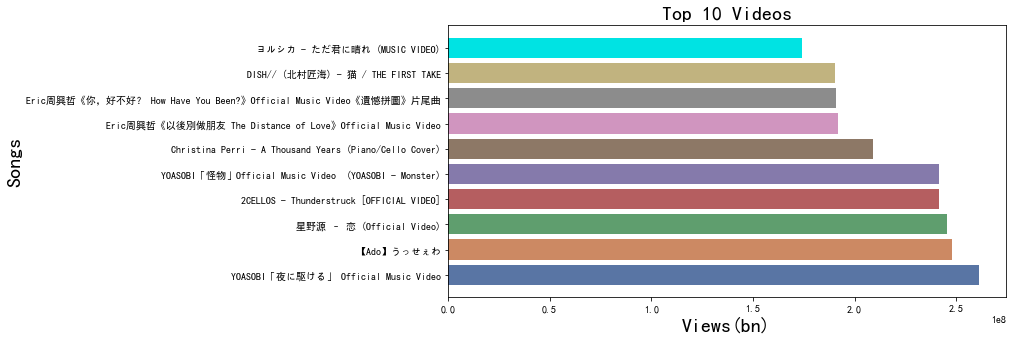

In [31]:
fig = plt.figure(figsize=(10, 5)) 
# ['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f', '#00E3E3']
color = ['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f', '#00E3E3']
# creating the bar plot 
plt.barh(top10_videos['VideoTitle'], top10_videos['Views'], color=color)
plt.xlabel("Views(bn)",fontsize=20) 
plt.ylabel("Songs",fontsize=20) 
plt.title("Top 10 Videos",fontsize=20)
plt.show()

## 加入年份

In [32]:
data_all_channel['Year'] = pd.to_datetime(data_all_channel['PublishedAt']).dt.strftime('%Y')
data_all_channel

ChannelTitle                                         VideoTitle  \
0     Ru's Piano Ru味春捲  NARUTO 20th Anniversary『ROAD OF NARUTO』Piano M...   
1     Ru's Piano Ru味春捲  When Lucy Plays「Let You Down」Cyberpunk: Edgeru...   
2     Ru's Piano Ru味春捲  When Lucy Plays「I Really Want to Stay at Your ...   
3     Ru's Piano Ru味春捲  Lycoris Recoil ED「Tower of Flower / Hana no To...   
4     Ru's Piano Ru味春捲  SPY×FAMILY OP2「SOUVENIR」Ru's Piano Cover | SPY...   
...                ...                                                ...   
3152   First To Eleven             First To Eleven- Just Pretend Acoustic   
3153   First To Eleven                    DNCE- Cake By The Ocean (Cover)   
3154   First To Eleven                First To Eleven - James Conner Song   
3155   First To Eleven               Twenty One Pilots - Tear In My Heart   
3156   First To Eleven                     First to Eleven - Just Pretend   

                                            Description PublishedAt Language  \
0     NARUTO 20th Anniversary「ROAD OF NARUTO」Piano M...  2022-10-15    en-US   
1     When Lucy Plays「Let You Down」Cyberpunk: Edgeru...  2022-10-12    en-US   
2     When Lucy Plays「I Really Want to Stay at Your ...  2022-10-08    en-US   
3     Lycoris Recoil ED「Tower of Flower」Emotional Ve...  2022-10-05    en-US   
4     SPY×FAMILY OP2「SOUVENIR」Ru's Piano Cover (TV S...  2022-10-01    en-US   
...                                                 ...         ...      ...   
3152  Check out our acoustic version of Just Pretend...  2016-05-25            
3153  Hey guys! We are really digging this song righ...  2016-05-19            
3154  James Conner is an inspiration to many, but es...  2016-04-16            
3155  We LOVE this song so much we decided to do it ...  2016-03-30            
3156  Check out our covers and original music on iTu...  2016-03-23       en   

        Views  Likes  CommentCount  \
0       47031    NaN         480.0   
1      123296    NaN         558.0   
2     1264753    NaN        2169.0   
3      103201    NaN         413.0   
4       82592    NaN         386.0   
...       ...    ...           ...   
3152    24833    NaN          30.0   
3153   219185    NaN         210.0   
3154    18499    NaN          14.0   
3155   107365    NaN         114.0   
3156   354827    NaN         287.0   

                                                 Image  \
0     https://i.ytimg.com/vi/MhB_5gu5Ufo/hqdefault.jpg   
1     https://i.ytimg.com/vi/D3pvMwKY854/hqdefault.jpg   
2     https://i.ytimg.com/vi/xu4eioDS_OM/hqdefault.jpg   
3     https://i.ytimg.com/vi/6X-DZOe3-Ck/hqdefault.jpg   
4     https://i.ytimg.com/vi/sMJq79PfqzM/hqdefault.jpg   
...                                                ...   
3152  https://i.ytimg.com/vi/YEXY6HmprZw/hqdefault.jpg   
3153  https://i.ytimg.com/vi/5DXkFIiXQYQ/hqdefault.jpg   
3154  https://i.ytimg.com/vi/vGTiJfyJQr0/hqdefault.jpg   
3155  https://i.ytimg.com/vi/WNUMNIyCtAo/hqdefault.jpg   
3156  https://i.ytimg.com/vi/qUAhsu6AlEs/hqdefault.jpg   

                                                   Tags  ...  Tag68 Tag69  \
0                                                        ...   None  None   
1     [Cyberpunk: Edgerunners, Let You Down, 電馭叛客, 露...  ...   None  None   
2     [I Really Want to Stay at Your House, 電馭叛客, 一起...  ...   None  None   
3     [Lycoris Recoil, Tower of Flower, 花の塔, Sakana,...  ...   None  None   
4     [SPY×FAMILY Part2, 間諜家家酒 新歌, SOUVENIR, 間諜家家酒 O...  ...   None  None   
...                                                 ...  ...    ...   ...   
3152  [first, to, eleve, just, pretend, erie, pa, pv...  ...   None  None   
3153  [DNCE, CAKE, BY, THE, OCEAN, JONAS, JOE, DEMI,...  ...   None  None   
3154  [first, to, eleven, james, connor, pitt, footb...  ...   None  None   
3155  [first, to, eleven, falling, in, reverse, four...  ...   None  None   
3156  [first, to, eleven, erie, music, vans, warped,...  ...   None  None   

      Tag70 Tag71 Tag72 Tag73 Tag74 Tag75 Tag

## 顯示年份上傳影片數量及排序

In [33]:
videos_per_year = data_all_channel.groupby('Year', as_index=False).size()
videos_per_year

Year  size
0   2008     2
1   2010     2
2   2011    23
3   2012    36
4   2013    93
5   2014   106
6   2015   152
7   2016   149
8   2017   155
9   2018   262
10  2019   415
11  2020   576
12  2021   618
13  2022   568

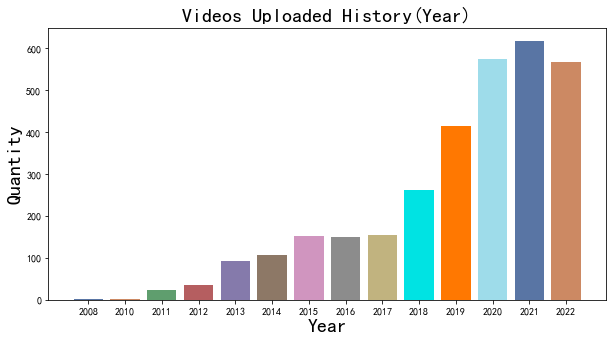

In [34]:
fig = plt.figure(figsize=(10, 5)) 
color = ['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f', '#00E3E3', '#ff7801','#9edcea']
# creating the bar plot 
plt.bar(videos_per_year['Year'], videos_per_year['size'], color=color) 
  
plt.xlabel("Year",fontsize=20) 
plt.ylabel("Quantity",fontsize=20) 
plt.title("Videos Uploaded History(Year)",fontsize=20)
plt.show()

## 加入月份

In [35]:
data_all_channel['Month'] = pd.to_datetime(data_all_channel['PublishedAt']).dt.strftime('%m')
data_all_channel.head()

ChannelTitle                                         VideoTitle  \
0  Ru's Piano Ru味春捲  NARUTO 20th Anniversary『ROAD OF NARUTO』Piano M...   
1  Ru's Piano Ru味春捲  When Lucy Plays「Let You Down」Cyberpunk: Edgeru...   
2  Ru's Piano Ru味春捲  When Lucy Plays「I Really Want to Stay at Your ...   
3  Ru's Piano Ru味春捲  Lycoris Recoil ED「Tower of Flower / Hana no To...   
4  Ru's Piano Ru味春捲  SPY×FAMILY OP2「SOUVENIR」Ru's Piano Cover | SPY...   

                                         Description PublishedAt Language  \
0  NARUTO 20th Anniversary「ROAD OF NARUTO」Piano M...  2022-10-15    en-US   
1  When Lucy Plays「Let You Down」Cyberpunk: Edgeru...  2022-10-12    en-US   
2  When Lucy Plays「I Really Want to Stay at Your ...  2022-10-08    en-US   
3  Lycoris Recoil ED「Tower of Flower」Emotional Ve...  2022-10-05    en-US   
4  SPY×FAMILY OP2「SOUVENIR」Ru's Piano Cover (TV S...  2022-10-01    en-US   

     Views  Likes  CommentCount  \
0    47031    NaN         480.0   
1   123296    NaN         558.0   
2  1264753    NaN        2169.0   
3   103201    NaN         413.0   
4    82592    NaN         386.0   

                                              Image  \
0  https://i.ytimg.com/vi/MhB_5gu5Ufo/hqdefault.jpg   
1  https://i.ytimg.com/vi/D3pvMwKY854/hqdefault.jpg   
2  https://i.ytimg.com/vi/xu4eioDS_OM/hqdefault.jpg   
3  https://i.ytimg.com/vi/6X-DZOe3-Ck/hqdefault.jpg   
4  https://i.ytimg.com/vi/sMJq79PfqzM/hqdefault.jpg   

                                                Tags  ...  Tag69 Tag70  Tag71  \
0                                                     ...   None  None   None   
1  [Cyberpunk: Edgerunners, Let You Down, 電馭叛客, 露...  ...   None  None   None   
2  [I Really Want to Stay at Your House, 電馭叛客, 一起...  ...   None  None   None   
3  [Lycoris Recoil, Tower of Flower, 花の塔, Sakana,...  ...   None  None   None   
4  [SPY×FAMILY Part2, 間諜家家酒 新歌, SOUVENIR, 間諜家家酒 O...  ...   None  None   None   

  Tag72 Tag73 Tag74 Tag75 Tag76  Year Month  
0  None  None  None  None  None  2022    10  
1  None  None  None  None  None  2022    10  
2  None  None  None  None  None  2022    10  
3  None  None  None  None  None  2022    10  
4  None  None  None  None  None  2022    10  

[5 rows x 97 columns]

## 顯示個月份上傳數量

In [36]:
videos_per_month = data_all_channel.groupby('Month', as_index=False).size()
videos_per_month

Month  size
0     01   239
1     02   224
2     03   256
3     04   249
4     05   276
5     06   276
6     07   289
7     08   288
8     09   279
9     10   259
10    11   244
11    12   278

In [37]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [106]:
# videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories = sort_order, ordered=True)
# videos_per_month = videos_per_month.sort_index()
# videos_per_month

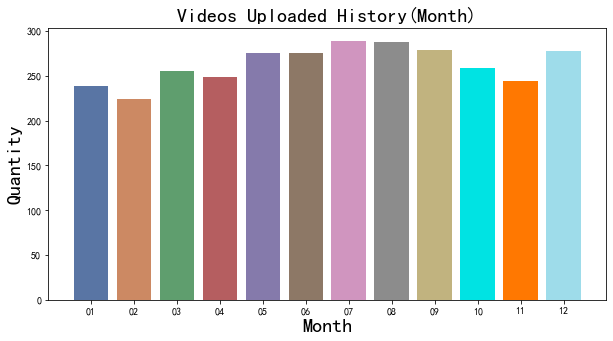

In [38]:
fig = plt.figure(figsize=(10, 5)) 
color = ['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f', '#00E3E3', '#ff7801','#9edcea']
# creating the bar plot 
plt.bar(videos_per_month['Month'], videos_per_month['size'], color=color) 
  
plt.xlabel("Month",fontsize=20) 
plt.ylabel("Quantity",fontsize=20) 
plt.title("Videos Uploaded History(Month)",fontsize=20)
plt.show()

## 文字雲

In [51]:
from collections import Counter
all_terms = []
for terms in data_all_channel['Tags']:
    all_terms.extend(terms)
sorted(dict(Counter(all_terms)).items(), key=lambda x:x[1], reverse=True)

[('cover', 871),
 ('ピアノ', 695),
 ('音樂', 619),
 ('piano', 615),
 ('弾いてみた', 553),
 ('panpiano', 541),
 ('鋼琴', 540),
 ('演奏', 529),
 ('獨奏', 517),
 ('PANPIANO', 502),
 ('arrangement', 500),
 ('コバソロ', 490),
 ('kobasolo', 488),
 ('first take', 375),
 ('ファーストテイク', 375),
 ('the first take', 374),
 ('COLORS', 372),
 ('ファステク', 372),
 ('一発撮り', 372),
 ('緊張感', 371),
 ('DSCVR', 369),
 ('Tokyo sounds', 369),
 ('lute', 369),
 ('tiny desk', 366),
 ('KOBASOLO', 293),
 ('こばそろ', 291),
 ('チャンネル登録者数10000人突破しました!／コバソロ', 265),
 ('恋する乙男／コバソロ（Original）', 259),
 ('カケラ/コバソロ(orignal)', 259),
 ('ネガイゴト/コバソロ（Original）', 259),
 ('質問に答えてみよう/コバソロ', 258),
 ('質問に答えてみよう②/コバソロ', 257),
 ('cello', 247),
 ('The Piano Guys', 247),
 ('Echo/コバソロwith良知真次（Original）', 238),
 ('チャンネル登録者数20000人突破!!/コバソロ', 235),
 ('旅立ち／コバソロwith良知真次（Orignalsong）', 225),
 ('NEWALBUM『コバソロ★ワークショップ』30秒CM／コバソロ', 225),
 ('『背中合わせ』コバソロ（original）【商品紹介!?】1stminialbum『コバソロ☆ワンマンショー』', 224),
 ('music', 215),
 ('2CELLOS', 212),
 ('rock', 206),
 ('TABIJI／AUTRIBE（SelfCo

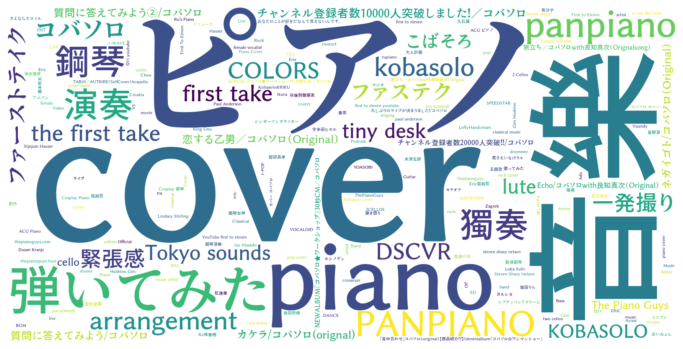

In [40]:
from wordcloud import WordCloud
from PIL import Image
from os import path
# mask = np.array(Image.open("wordcloud.png"))
font_path = 'ttf/GenEiAntiquePv5-M.ttf'
wc = WordCloud(width=1600, height=800, background_color='white', font_path = font_path)
wc.generate_from_frequencies(frequencies=dict(Counter(all_terms)))
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## 觀察流量留言及Tags之間的關係

In [47]:
def plot_views(df, channel_name):
    date = df.loc[df['ChannelTitle'] == channel_name, 'PublishedAt']
    views = df.loc[df['ChannelTitle'] == channel_name, 'Views']
    CommentCount = df.loc[df['ChannelTitle'] == channel_name, 'CommentCount']
    VideoTagNum = df.loc[df['ChannelTitle'] == channel_name, 'VideoTagNum']
    
#     plt.figure(figsize=(16,6))
#     plt.subplot(121)
#     plt.xlabel('Date')
#     plt.ylabel('Views')
#     plt.plot(date, views)
    
#     plt.subplot(122)
#     plt.xlabel('Date')
#     plt.ylabel('Comments')
#     plt.plot(date, CommentCount, color = 'g')

#     fig, ax1 = plt.subplots()
#     ax2 = ax1.twinx()
#     line1 = ax1.plot(date, views, color='#ff7801', label='Views')
#     line2 = ax2.plot(date, CommentCount, color='#5975a4', label='Comments')
#     lines = line1 + line2
#     labels = [l.get_label() for l in lines]
#     ax1.legend(lines, labels, loc=0)
    fig, (ax1, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

    parax2 = ax1.twinx()
    ax1.plot(date, views, c="#ff7801", label="Views")
    parax2.plot(date, CommentCount, c="#5975a4", label="Comments")
    ax1.legend(loc=0)
    
    parax4 = ax3.twinx()
    ax3.plot(date, views, c="#857aab", label="Views")
    parax4.plot(date, VideoTagNum, c="y", label="VideoTagNum")
    parax4.legend(loc=0)

    plt.suptitle(channel_name)

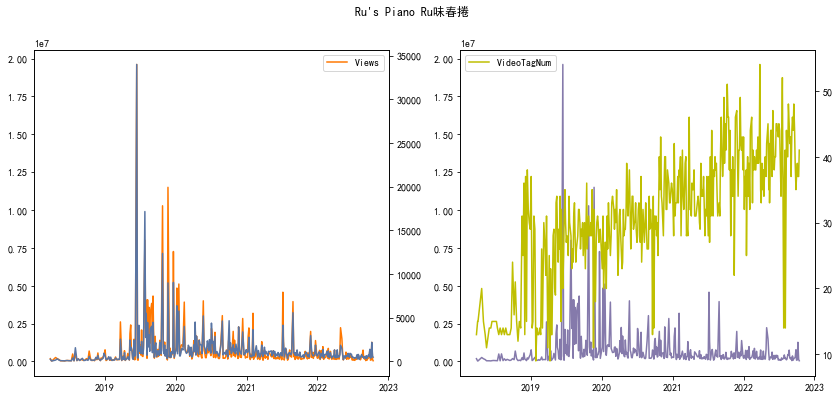

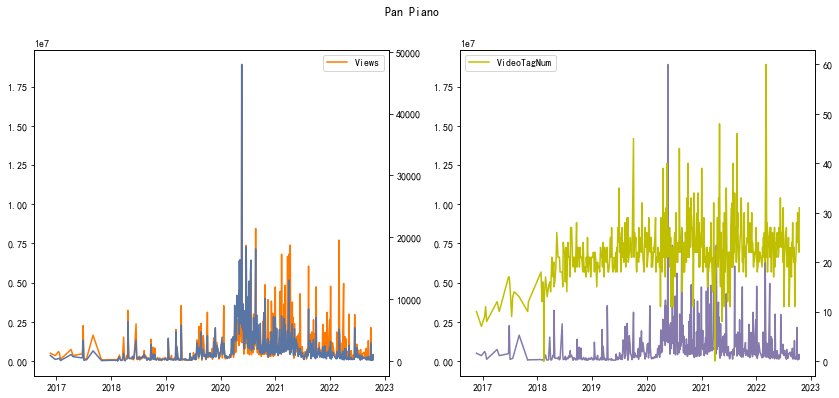

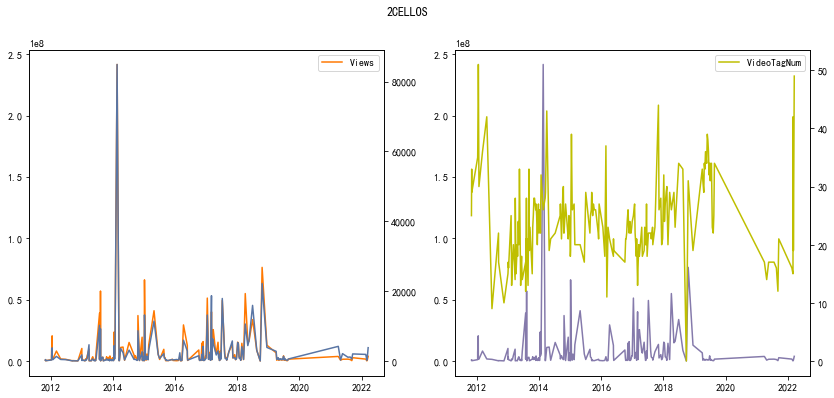

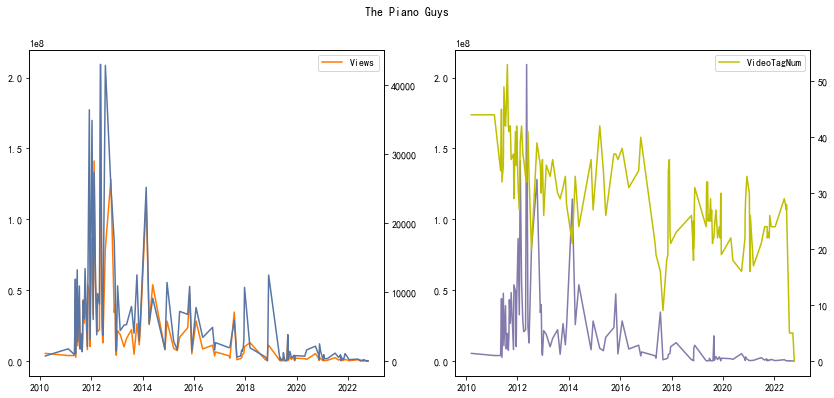

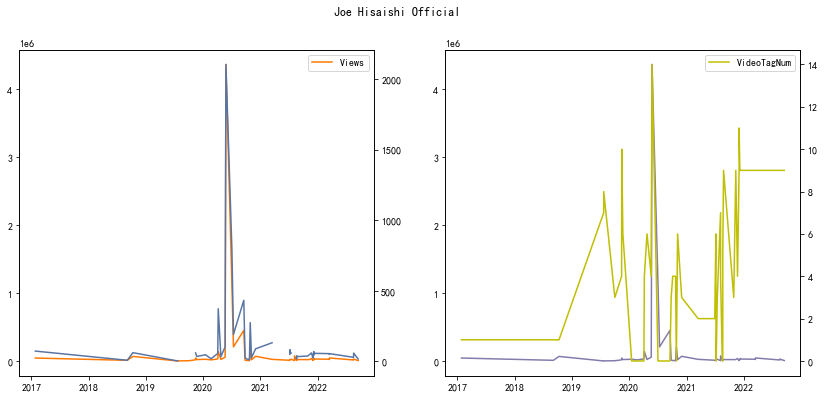

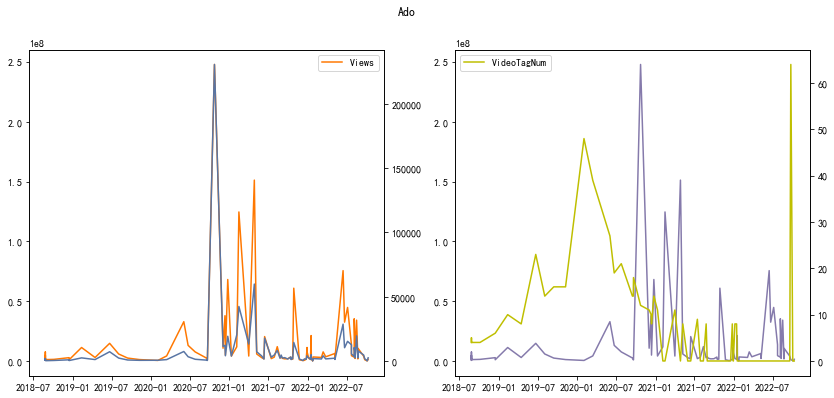

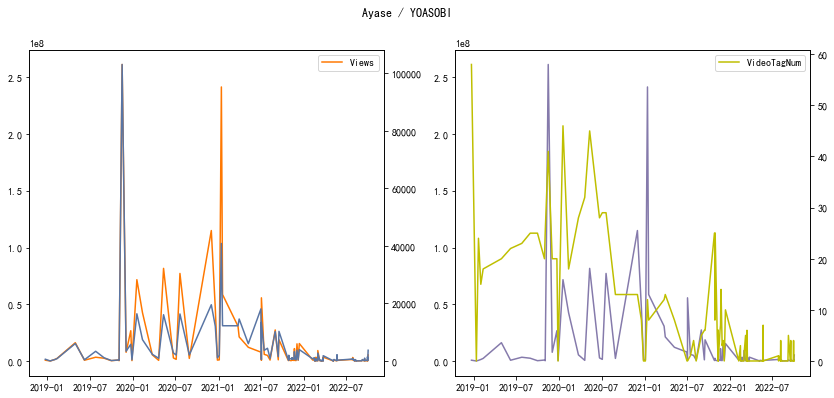

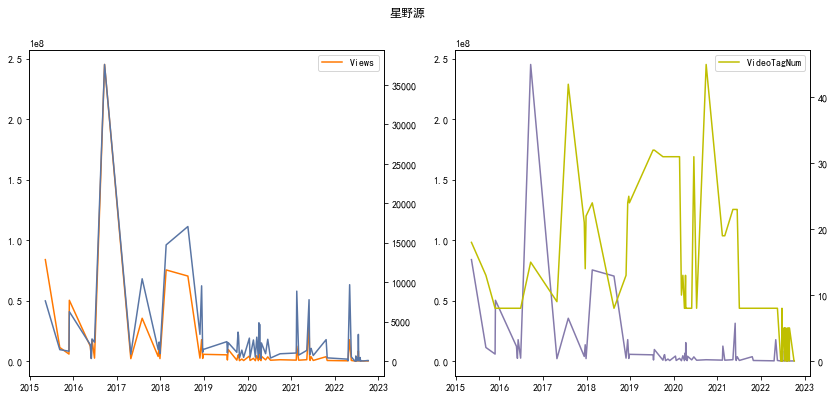

/Users/takuya/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


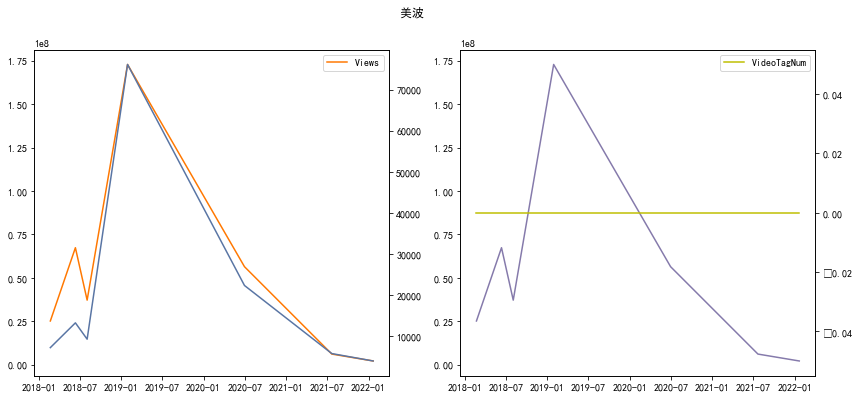

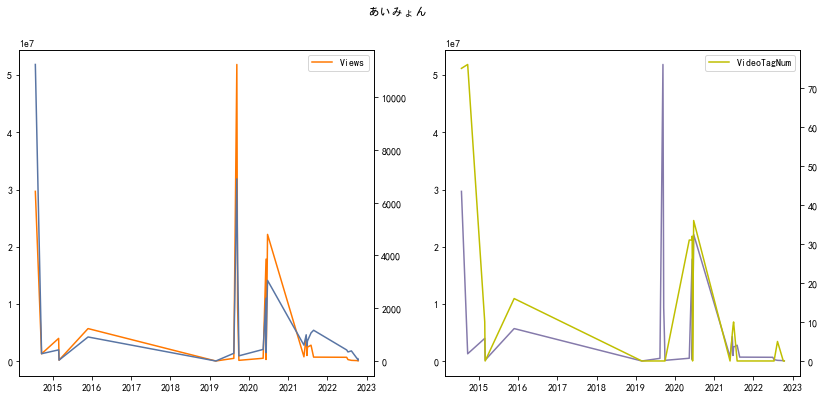

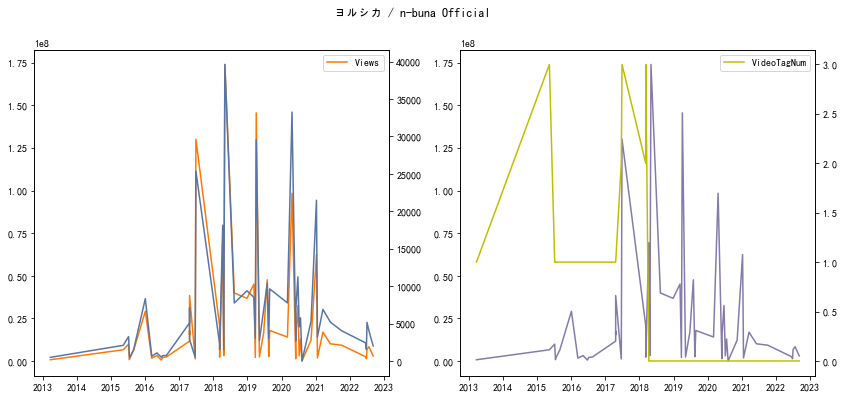

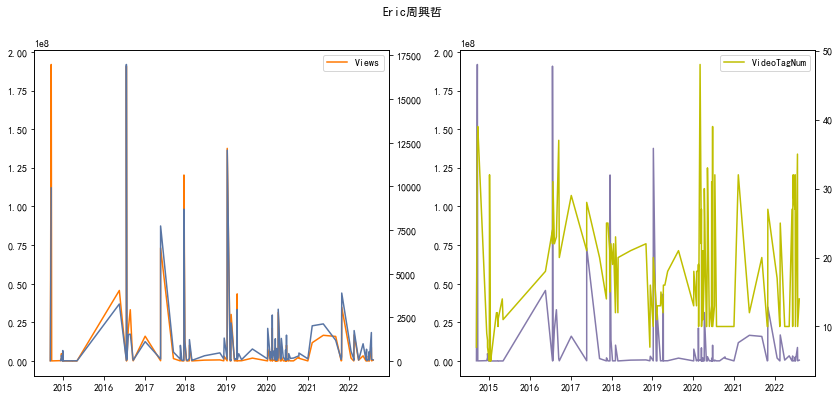

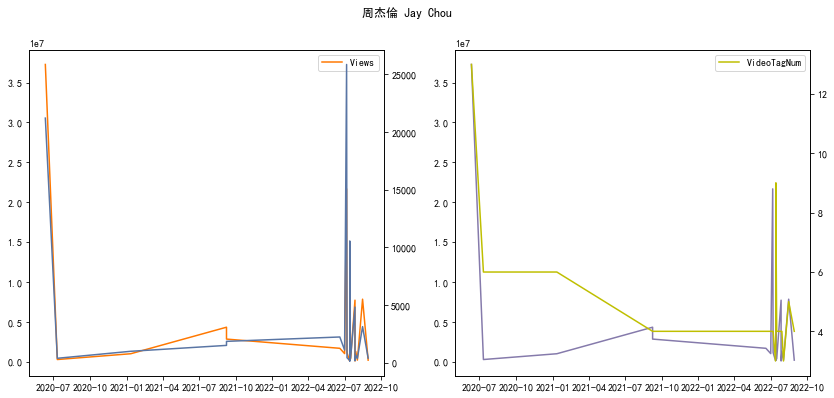

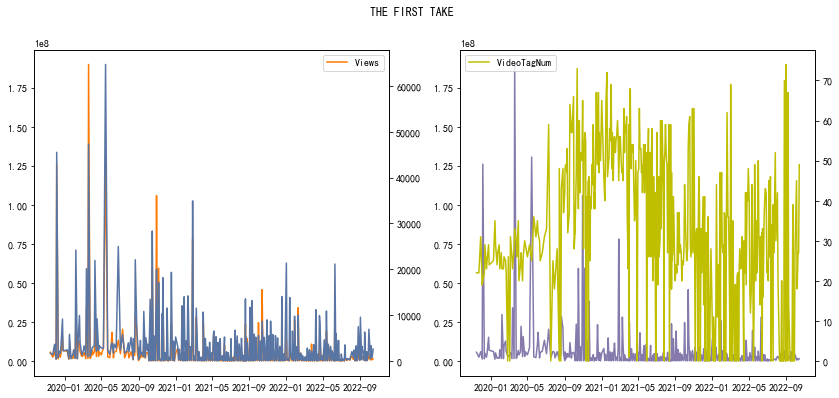

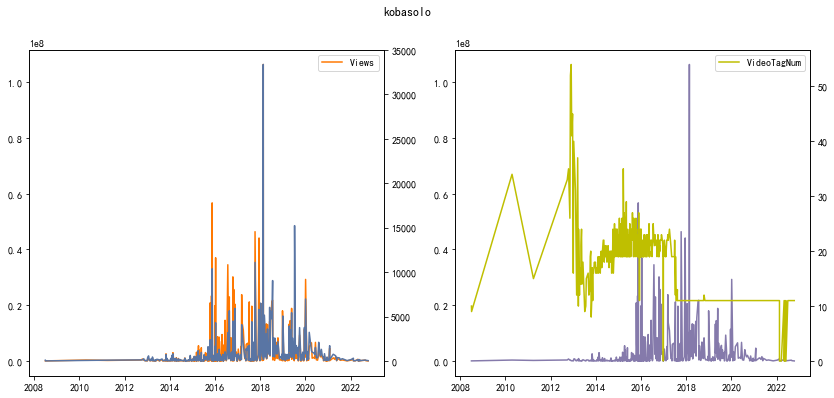

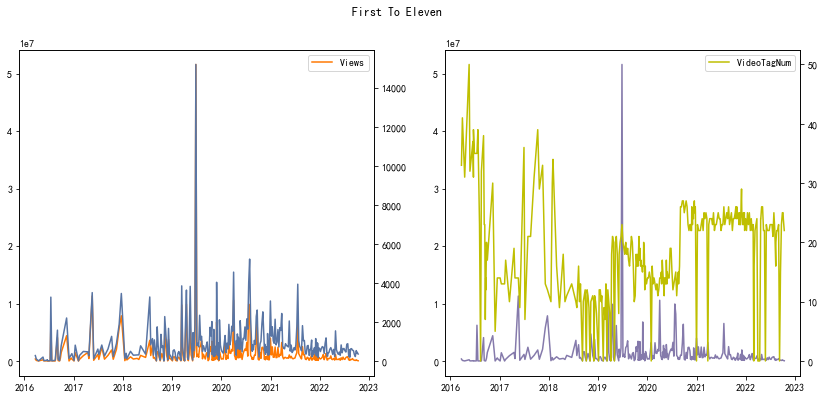

In [48]:
plot_views(data_all_channel, "Ru's Piano Ru味春捲")
plot_views(data_all_channel, "Pan Piano")
plot_views(data_all_channel, "2CELLOS")
plot_views(data_all_channel, "The Piano Guys")
plot_views(data_all_channel, "Joe Hisaishi Official")
plot_views(data_all_channel, "Ado")
plot_views(data_all_channel, "Ayase / YOASOBI")
plot_views(data_all_channel, "星野源")
plot_views(data_all_channel, "美波")
plot_views(data_all_channel, "あいみょん")
plot_views(data_all_channel, "ヨルシカ / n-buna Official")
plot_views(data_all_channel, "Eric周興哲")
plot_views(data_all_channel, "周杰倫 Jay Chou")
plot_views(data_all_channel, "THE FIRST TAKE")
plot_views(data_all_channel, "kobasolo")
plot_views(data_all_channel, "First To Eleven")

In [55]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [56]:
text = "Here is the sentence I want embeddings for."
marked_text = "[CLS] " + text + " [SEP]"

# Tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)

# Print out the tokens.
print (tokenized_text)

['[CLS]', 'here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.', '[SEP]']


In [57]:
list(tokenizer.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

In [58]:
# Define a new example sentence with multiple meanings of the word "bank"
text = "After stealing money from the bank vault, the bank robber was seen " \
       "fishing on the Mississippi river bank."

# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"

# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
after         2,044
stealing     11,065
money         2,769
from          2,013
the           1,996
bank          2,924
vault        11,632
,             1,010
the           1,996
bank          2,924
robber       27,307
was           2,001
seen          2,464
fishing       5,645
on            2,006
the           1,996
mississippi   5,900
river         2,314
bank          2,924
.             1,012
[SEP]           102


In [59]:
# Mark each of the 22 tokens as belonging to sentence "1".
segments_ids = [1] * len(tokenized_text)

print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
